### Exploración de features. Gonzalo: ap_hi, ap_lo, cholesterol y gluc

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
# Se cargan las funciones desde la otra notebook
%run 'funciones.ipynb'

In [26]:
data = pd.read_csv('../data/Health Screening Data.csv', index_col= None)
data = data.drop(columns=['Unnamed: 0', 'id',])


In [27]:
columns = ['ap_hi', 'ap_lo', 'cholesterol', 'gluc']
data[columns].isnull().sum()

ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
dtype: int64

In [28]:
data[columns].describe()

,ap_hi,ap_lo,cholesterol,gluc
count,69960.000000,69960.000000,69960.000000,69960.000000
mean,126.681089,96.647642,1.366852,1.226487
std,18.205557,188.523437,0.680280,0.572285
min,-150.000000,-70.000000,1.000000,1.000000
25%,120.000000,80.000000,1.000000,1.000000
50%,120.000000,80.000000,1.000000,1.000000
75%,140.000000,90.000000,2.000000,1.000000
max,240.000000,11000.000000,3.000000,3.000000


#### Presion Arterial: 

##### ap_hi

In [29]:
# ap_hi. 
print(f'valores de TAS menores de 90 mmHg: {data.ap_hi[(data.ap_hi<90)].count()}')
print(f'valores de TAS mayores de 240 mmHg: {data.ap_hi[(data.ap_hi>240)].count()}')

valores de TAS menores de 90 mmHg: 321
valores de TAS mayores de 240 mmHg: 0


In [30]:
# Analisis del los valores menores a 90 mmHg
data.ap_hi[data.ap_hi<90].unique()


array([  80,   14,   70,   11,   12,   10,   16, -100,   85,    7,   15,
         17,    1,   13,   60, -115,   20, -140, -120, -150,   24])

##### ap_lo

In [31]:
print(f'valores con TAD menores de 40 mmHg: {data.ap_lo[data.ap_lo<40].count()}')
print(f'valores con TAD mayores de 120 mmHg: {data.ap_lo[data.ap_lo>120].count()}')

valores con TAD menores de 40 mmHg: 52
valores con TAD mayores de 120 mmHg: 1056


In [32]:
# Analisis del los valores menores de 40 y mayores de 120 mmHg
data.ap_lo[(data.ap_lo<40)|(data.ap_lo>120)].unique()

array([ 1100,  1000,   800,    30,  1033,   150,  1001,  1200, 10000,
        8044,   140,  1044,   125,   170,   160,   130,  9100,    10,
         902,     8,  1008,  2088,    20,   802,  8000,  1022,   850,
         708,  9011,  1011,     0,  1007,  1177,  7100,   709,  8500,
        1110,  8099,  1088,   126,  1077,  1120,     7,  1125,   180,
         121,  8100,   710,  5700,  8079,  1111,  1003,     6,  1900,
         809,   801,  1002,     1,   182,   810,     9,  7099, 11000,
        9800,  8200,  1139,   820,  1400,   190,   900,   122,  6800,
         135,   700,    15,  1101,   910,  1140,  1211,   -70,  8077,
         901,   880,   870,   585,   602])

In [44]:
# corrección TAS y TAD (se consideran diferentes errores de carga)
# funcion importada
data['TAS'] = data.ap_hi.apply(correct_TA, args=((90,240),0))
data['TAD'] = data.ap_lo.apply(correct_TA, args=((40,120),0))

In [45]:
# Se eliminan las columnas ap_hi y ap_lo
data.drop(columns=['ap_hi','ap_lo'], inplace=True)

In [46]:
print(f'cantidad de valores en TAS sin poder corregir: {data.TAS[data.TAS == 999].count()}')
print(f'cantidad de valores en TAD sin poder corregir: {data.TAD[data.TAD == 999].count()}')

cantidad de valores en TAS sin poder corregir: 136
cantidad de valores en TAD sin poder corregir: 170


In [48]:
# Se imputan los datos faltantes de TAD o TAS utilizando un delta de 40 mmHg entre uno y otro
# funcion importada
data = data.apply(complete_TA, axis=1)

In [50]:
print(f'hay {data.TAS[(data.TAS <= data.TAD)].count()} casos en que la TAS es <= TAD')

hay 8 casos en que la TAS es <= TAD


In [51]:
# Se corrigen las incoherencias entre TAS y TAD (considerando la TAS como valor de referencia)
# funcion importada
data = data.apply(control_TA, axis=1)

print(f'hay {data.TAS[(data.TAS <= data.TAD)].count()} casos en que la TAS es <= TAD')

hay 0 casos en que la TAS es <= TAD


In [52]:
data.isnull().sum()

age             0
gender          0
height          0
weight          0
cholesterol     0
gluc            0
smoke           0
alco            0
active          0
cardio          0
AgeinYr         0
BMI             0
BMICat          0
AgeGroup        0
TAS            16
TAD            16
dtype: int64

In [53]:
# se eliminan esos 16 valores nulos
data = data.dropna()

#### Presión de pulso   [explicación](https://en.wikipedia.org/wiki/Pulse_pressure#Relationship_to_heart_disease)

In [54]:
# Se genera la variable PP (presión de pulso)
data['PP'] = data.TAS - data.TAD

In [55]:
print(data.PP.describe())

count    69944.000000
mean        45.502615
std         11.758858
min          5.000000
25%         40.000000
50%         40.000000
75%         50.000000
max        140.000000
Name: PP, dtype: float64


In [56]:
data.to_csv('../data/data_temp_gonza.csv', index_label=False)

#### Colesterol, es una variable categórica de tres niveles. No sabemos exactamente a qué responden cada una.
[Tres categorias de colesterol total](https://medlineplus.gov/spanish/pruebas-de-laboratorio/niveles-de-colesterol/)

In [20]:
data.cholesterol.unique()

array([1, 3, 2])

<AxesSubplot:xlabel='cholesterol', ylabel='Count'>

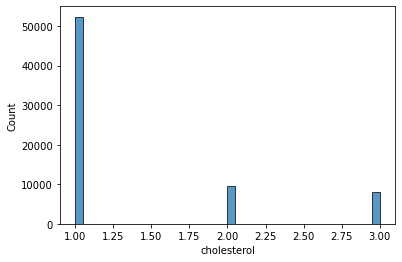

In [21]:

sns.histplot(data.cholesterol)

In [22]:
col_normal = data.cholesterol[data.cholesterol ==1].count()
col_patol = data.cholesterol[~(data.cholesterol ==1)].count()

In [23]:
print(col_normal, col_patol)

52348 17596


#### Glucemia: es una variable categorica de tres niveles. No sabemos a qué corresponde cada uno. Podria ser no diabetes, pre diabetes y diabetes. [Será esta clasficiacion?](https://dtc.ucsf.edu/es/tipos-de-diabetes/diabetes-tipo-1/comprension-de-la-diabetes-tipo-1/datos-basicos/diagnostico-de-la-diabetes/)

In [24]:
data.gluc.unique()

array([1, 2, 3])

In [108]:
selection.gluc.value_counts()

1    59443
3     5328
2     5189
Name: gluc, dtype: int64

<AxesSubplot:xlabel='gluc', ylabel='Count'>

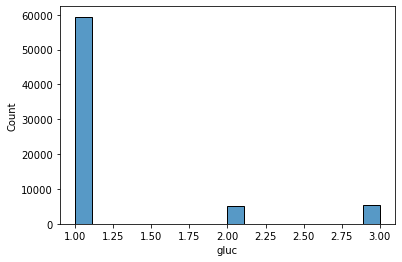

In [25]:
sns.histplot(data.gluc)

In [28]:
data.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,TAS,TAD,PP
count,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000,69944.000000
mean,19468.825232,1.349551,164.358630,74.207628,1.366779,1.226410,0.088171,0.053729,0.803643,0.499571,52.840501,27.556279,127.082234,81.607556,45.474678
std,2467.185476,0.476832,8.210072,14.396807,0.680200,0.572179,0.283545,0.225483,0.397245,0.500003,6.766570,6.093571,17.018217,9.899257,11.713647
min,10798.000000,1.000000,55.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.500000,80.000000,40.000000,5.000000
25%,17664.750000,1.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.900000,120.000000,80.000000,40.000000
50%,19703.000000,1.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.400000,120.000000,80.000000,40.000000
75%,21327.000000,2.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.200000,140.000000,90.000000,50.000000
max,23713.000000,2.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.700000,240.000000,200.000000,140.000000
